#### CS164 Pre-Class Work for Session 12.1

### Duality
_Yoav Rabinovich, Mar 2020_

------------------

#### Boyd Exercise 5.1: _A simple example_



_Consider the optimization problem:_

$$\begin{align*}
\min \ &x^2+1 \\
\text{s.t:} \ (&x-2)(x-4)\leq 0
\end{align*}$$

_with variable $x \in \mathbb{R}$._


**(a)** _Analysis of primal problem. Give the feasible set, the optimal value, and the optimal solution._

The feasible set, where $(x-2)(x-4)\leq0$ is $x \in [2,4]$. The objective function then minimizes at $x^*=2$, where it's value is $p^*=5$.

**(b)** _Lagrangian and dual function. Plot the objective $x^2 + 1$ versus $x$. On the same plot, show the feasible set, optimal point and value, and plot the Lagrangian $\mathcal{L}(x,\lambda)$ versus $x$ for a few positive values of $\lambda$. Verify the lower bound property $(p^* \leq \inf_x \mathcal{L}(x,\lambda) \text{ for } \lambda \geq 0)$. Derive and sketch the Lagrange dual function $g$._

The Lagragian for this problem is:

$$\mathcal{L}(x,\lambda) = x^2+1+\lambda(x-2)(x-4)$$

which is minimized with respect to $x$ when:

$$\frac{\partial \mathcal{L}}{\partial x} = 2x+2x\lambda-6\lambda = 0$$
$$x=\frac{3\lambda}{(\lambda+1)}$$.

Therefore the minimum of the Lagranian as a function of $\lambda$ is:
$$g(\lambda) = \Bigg\{ \begin{align*}
\frac{-\lambda^2+9\lambda+1}{(\lambda+1)}, \ &\lambda\geq-1\\
-\infty, \ &\lambda \leq -1
\end{align*}$$

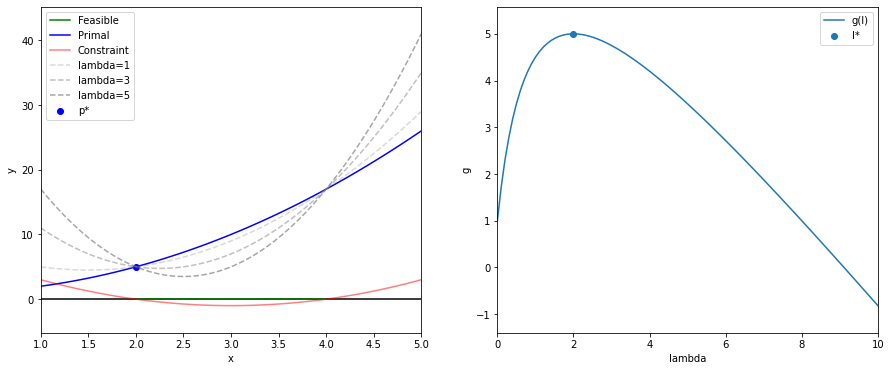

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,5,100)
p = x**2+1
c = x**2-6*x+8
L = lambda l: p+l*c
d = [L(1),L(3),L(5)]
f = x[np.where(c<=0)]
l = np.linspace(0,10,100)
g = (-l**2+9*l+1)/(l+1)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.axhline(0,c="black")
ax1.plot(f,np.full(len(f),0),c="green",label="Feasible")
ax1.plot(x,p,c="blue", label="Primal")
ax1.scatter(2,5,c="blue",label="p*")
ax1.plot(x,c,c="red",alpha=0.5, label="Constraint")
ax1.plot(x,d[0],"--",c="gray",alpha=0.3,label="lambda=1")
ax1.plot(x,d[1],"--",c="gray",alpha=0.5,label="lambda=3")
ax1.plot(x,d[2],"--",c="gray",alpha=0.7,label="lambda=5")
ax1.margins(0,0.1)
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel("lambda")
ax2.set_ylabel("g")
ax2.plot(l,g,label="g(l)")
ax2.scatter(2,5,label="l*")
ax2.legend()
ax2.margins(0,0.1)

plt.show()

**(c)** _Lagrange dual problem. State the dual problem, and verify that it is a concave maximization problem. Find the dual optimal value and dual optimal solution $\lambda^*$. Does strong duality hold?_

The dual problem is the maximization problem
$$\begin{align*}
\max_\lambda \ &g(\lambda)\\
\text{s.t:} \ &\lambda \geq -1
\end{align*}$$
which is concave from part (b) above. It's solution is $\lambda^* = 2$, where $g^*=5$. Since $g^*=p^*$, strong duality holds. This is expected, as the problem satisfies Slater's condition.

**(d)** _Sensitivity analysis. Let $p^*(u)$ denote the optimal value of the problem_
$$\begin{align*}
\min \ &x^2+1 \\
\text{s.t:} \ (&x-2)(x-4)\leq u
\end{align*}$$
_as a function of parameter $u$. Plot $p^*(u)$. Verify that $\frac{dp^*(0)}{du} = −\lambda^*$._

First of all, we notice that the feasible set it empty for $u<-1$, and a single point at $u=-1$, which doesn't satisfy Slater's condition. We therefore look at values above $-1$.

The Lagragian for this problem is:

$$\mathcal{L}(x,\lambda) = x^2+1+\lambda(x-2)(x-4)-
\lambda u$$

which is minimized with respect to $x$ at the same expression we had before for $x$.

Therefore the minimum of the Lagranian as a function of $\lambda$ is:
$$g(\lambda,u) = \frac{-\lambda^2 u - \lambda u + 9\lambda+1}{(\lambda+1)}, \ \lambda\neq-1.$$

Since strong duality holds, $g^*=p^*$, so for $\lambda^*=2$:

$$p^*(u)=\frac{-6 u +19}{3} = -2 u +\frac{19}{3}$$

for which the slope is $-\lambda^*=-2$.

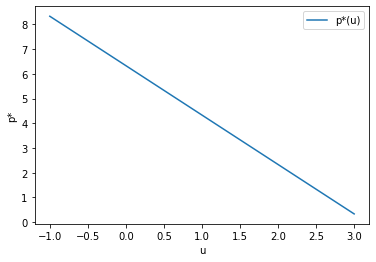

In [8]:
u = np.linspace(-1,3,100)
pstar = (-6*u+19)/3

plt.plot(u,pstar, label="p*(u)")
plt.xlabel("u")
plt.ylabel("p*")
plt.legend()
plt.show()

#### KKT Conditions

_Demonstrate mathematically how strong duality implies the KKT conditions - this shows the necessity of the KKT conditions for optimality._

